In [1]:
# Libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

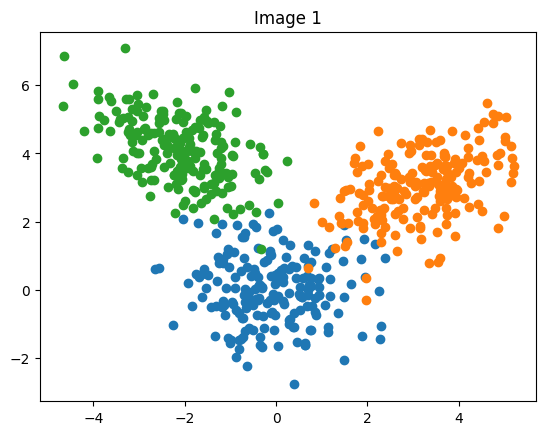

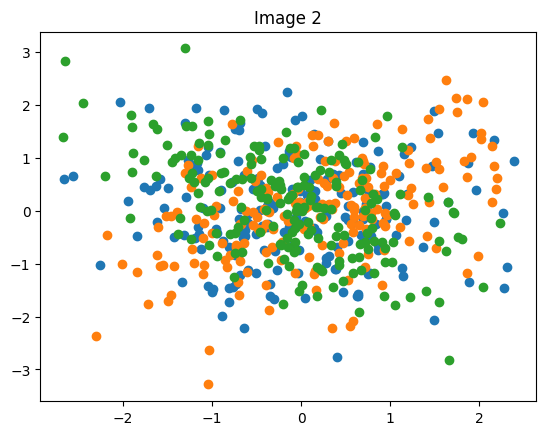

In [2]:
# Part1


df1 = pd.read_csv('/content/Image1.csv')
# Image1 
dis11X = df1['0'].tolist()[0:199]
dis11Y = df1['1'].tolist()[0:199]

dis12X = df1['0'].tolist()[200:399]
dis12Y = df1['1'].tolist()[200:399]

dis13X = df1['0'].tolist()[400:599]
dis13Y = df1['1'].tolist()[400:599]

plt.scatter(dis11X,dis11Y)
plt.scatter(dis12X,dis12Y)
plt.scatter(dis13X,dis13Y)

plt.title("Image 1")
plt.savefig("Image1_P1.png")
files.download("Image1_P1.png") 

plt.figure()

df2 = pd.read_csv('/content/Image2.csv')
# Image2 
dis21X = df2['0'].tolist()[0:199]
dis21Y = df2['1'].tolist()[0:199]

dis22X = df2['0'].tolist()[200:399]
dis22Y = df2['1'].tolist()[200:399]

dis23X = df2['0'].tolist()[400:599]
dis23Y = df2['1'].tolist()[400:599]

plt.scatter(dis21X,dis21Y)
plt.scatter(dis22X,dis22Y)
plt.scatter(dis23X,dis23Y)

plt.title("Image 2")
plt.savefig("Image2_P1")
files.download("Image2_P1.png")


In [3]:
# Libraries
import random 

In [4]:
# Part2.1


# Computing 2-d Gaussian distribution output of a 2-d input
def Normal_Dist_2D(x, mu, Sigma):
  n1 = np.float128(2 * np.pi * np.sqrt(abs(np.linalg.det(Sigma))))
  n2 = np.float128((-1/2) * np.matmul(np.matmul(np.transpose(x - mu), np.linalg.inv(Sigma)), (x - mu)))
  N = (1/n1) * np.exp(n2) 
  return N

# Performing E-step i.e. returning the responsibility matrix based on given parameters
def E_Step(x, N, K, pi, mu, Sigma):

  gamma = np.zeros([K, N])

  GMM = np.zeros([K, N])
  for k in range(K):
    for n in range(N):
      GMM[k, n] = pi[0, k] * Normal_Dist_2D(x[:, n], mu[:, k], Sigma[:, [2*k,2*k+1]])

  for k in range(K):
    for n in range(N):
      gamma[k,n] = GMM[k, n] / sum(GMM[:, n])

  return gamma


In [5]:
# Part2.2


# Setting the variables
N = 600
K = 3

# Image1
x1 = np.transpose(df1.to_numpy()[:, [1, 2]])

# Initializing the parameters to start the algorithm
pi1 = np.ones((1, K))/K
mu1 = np.zeros([2, K])
Sigma1 = np.zeros([2, 2*K])
for k in range(K):
  mu1[0, k] = random.choice(x1[0, :])
  mu1[1, k] = random.choice(x1[1, :])
  Sigma1[:, [2*k, 2*k+1]] = np.cov(x1)

# Perform the E-step for one iteration
gamma1 = E_Step(x1, N, K, pi1, mu1, Sigma1)

# Decide the responsible Gaussian for each data point
responsibility1 = np.zeros([1, N])
for n in range(N):
  responsibility1[0, n] = np.argmax(gamma1[:, n])

# Display the output
print(responsibility1)


# Image2
x2 = np.transpose(df2.to_numpy()[:, [1, 2]])

pi2 = np.ones((1, K))/K
mu2 = np.zeros([2, K])
Sigma2 = np.zeros([2, 2*K])
for k in range(K):
  mu2[0, k] = random.choice(x2[0, :])
  mu2[1, k] = random.choice(x2[1, :])
  Sigma2[:, [2*k, 2*k+1]] = np.cov(x2)

gamma2 = E_Step(x2, N, K, pi2, mu2, Sigma2)

responsibility2 = np.zeros([1, N])
for n in range(N):
  responsibility2[0, n] = np.argmax(gamma2[:, n])

print(responsibility2)


[[0. 2. 2. 0. 2. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2.
  2. 2. 2. 2. 2. 0. 1. 1. 0. 0. 0. 2. 2. 1. 0. 2. 0. 1. 2. 2. 2. 2. 2. 0.
  1. 1. 2. 0. 0. 1. 2. 0. 2. 0. 2. 2. 1. 2. 1. 2. 1. 0. 0. 1. 2. 0. 1. 1.
  2. 2. 2. 0. 1. 1. 0. 1. 2. 0. 0. 0. 1. 2. 2. 0. 0. 0. 1. 1. 1. 0. 0. 2.
  0. 2. 0. 0. 0. 2. 0. 0. 2. 2. 0. 2. 2. 1. 2. 2. 1. 2. 1. 0. 2. 2. 2. 0.
  2. 2. 0. 2. 2. 2. 1. 1. 2. 1. 0. 2. 0. 0. 2. 0. 1. 2. 1. 2. 1. 2. 2. 0.
  2. 2. 2. 1. 2. 0. 1. 0. 2. 1. 2. 2. 2. 2. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
  2. 2. 2. 2. 2. 0. 2. 1. 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 0.
  0. 0. 2. 2. 0. 2. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0.
  2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 0.
  0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 2. 2. 0. 2. 0. 0. 2. 0.
  0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0.
  0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 0. 2. 

In [6]:
# Part3


def M_Step(N, K, X, gamma):
  pi = np.ones((1, K))/K
  mu = np.zeros([2, K])
  Sigma = np.zeros([2, 2*K])
  
  for k in range(K):
    pi[0, k] = (1 / N) * sum(gamma[k, :])
    mu[0, k] = sum(X[0, :] * gamma[k, :]) / (sum(gamma[k, :]) + 1e-8)
    mu[1, k] = sum(X[1, :] * gamma[k, :]) / (sum(gamma[k, :]) + 1e-8)
    Sigma[:, [2*k,2*k+1]] = np.dot((X - mu[:, k][:, np.newaxis]) * gamma[k, :], (X - mu[:, k][:, np.newaxis]).T) / (sum(gamma[k, :]) + 1e-8)
    
  return pi, mu, Sigma

  
[pi1, mu1, Sigma1] = M_Step(N, K, x1, gamma1)
[pi2, mu2, Sigma2] = M_Step(N, K, x2, gamma2)
print(pi1,mu1,Sigma1)
print(pi2,mu2,Sigma2)


[[0.28230004 0.38118165 0.3365183 ]] [[ 2.01872484 -1.17057436  0.54709973]
 [ 1.76704082  2.98717944  2.20004439]] [[ 3.49398129  2.34768568  3.47585934 -1.53863169  4.87518241  0.26690026]
 [ 2.34768568  3.42887335 -1.53863169  3.8981003   0.26690026  3.66115005]]
[[0.26008229 0.40143535 0.33848236]] [[-0.62742758  0.24360656  0.11773403]
 [ 0.19080465 -0.59737744  0.69338645]] [[ 0.73169298 -0.0308642   0.78597306  0.10277069  0.97695494  0.03919076]
 [-0.0308642   0.65418175  0.10277069  0.6339313   0.03919076  0.56081087]]


In [7]:
# Libraries 
from scipy.stats import multivariate_normal 

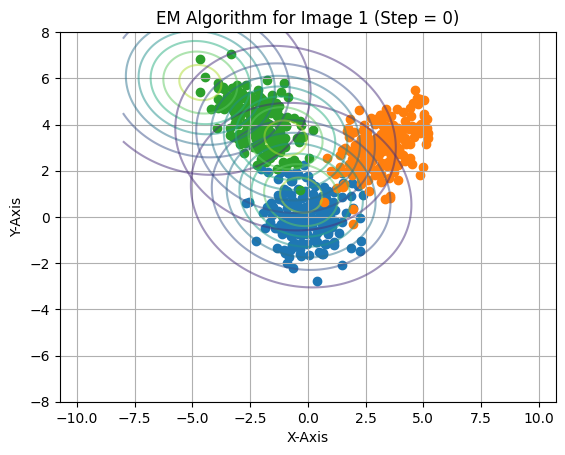

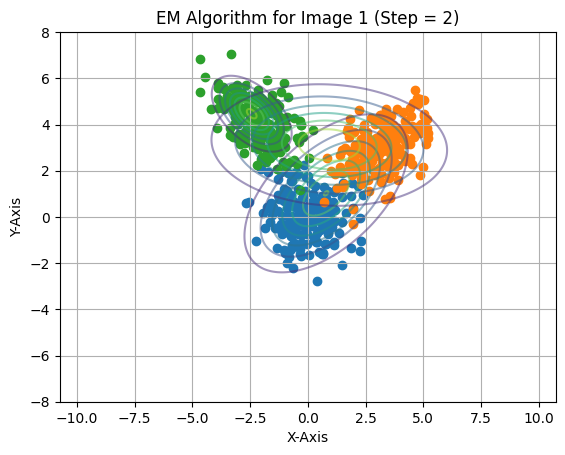

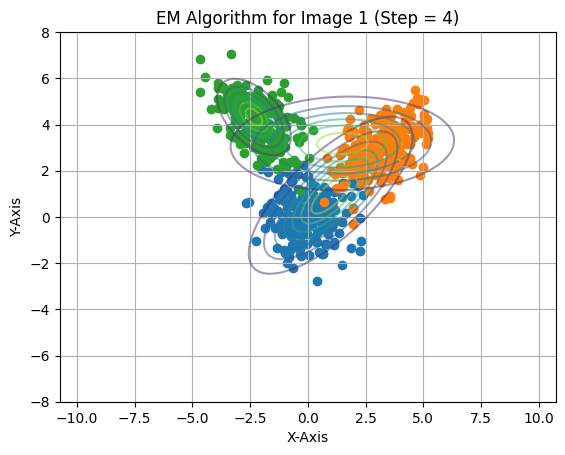

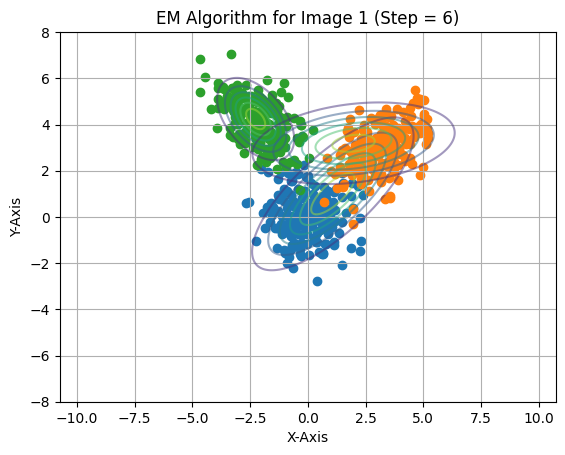

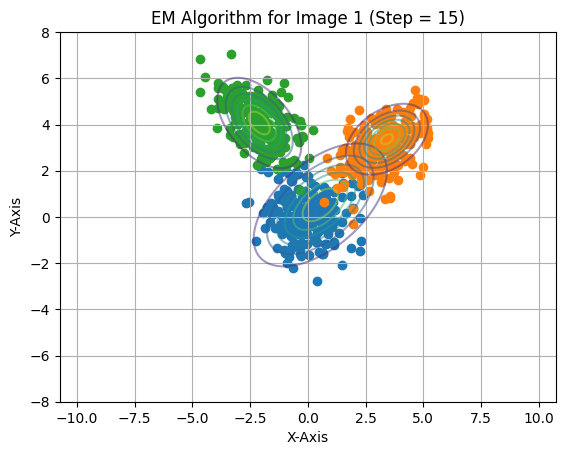

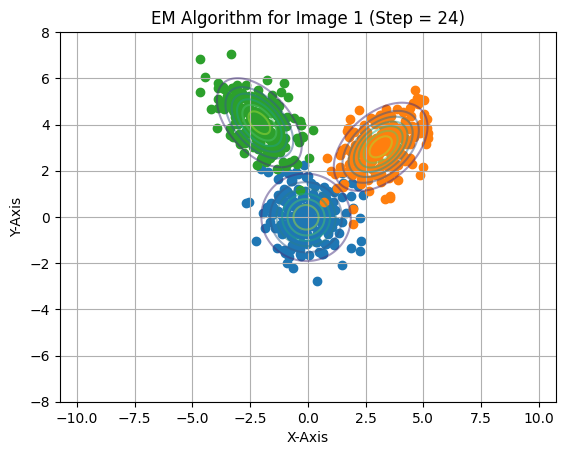

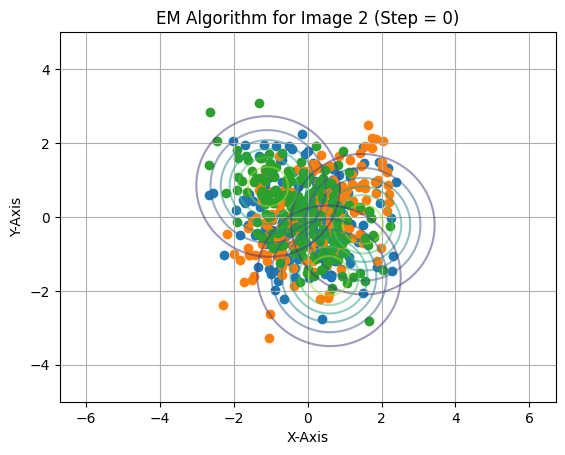

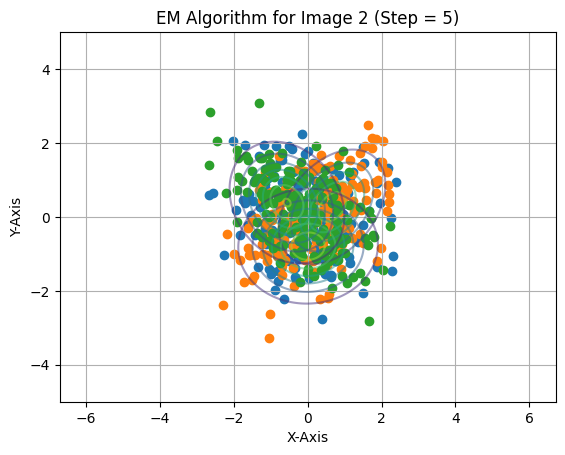

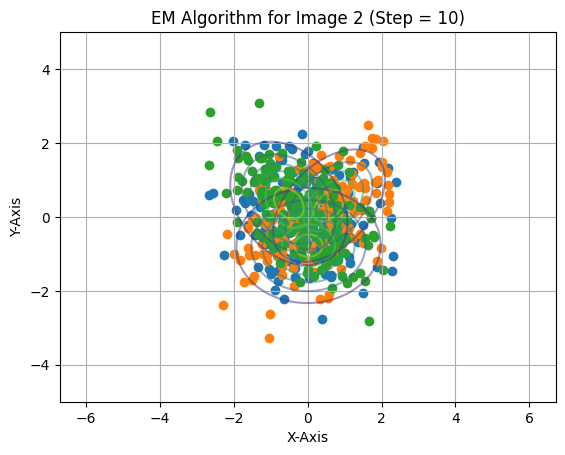

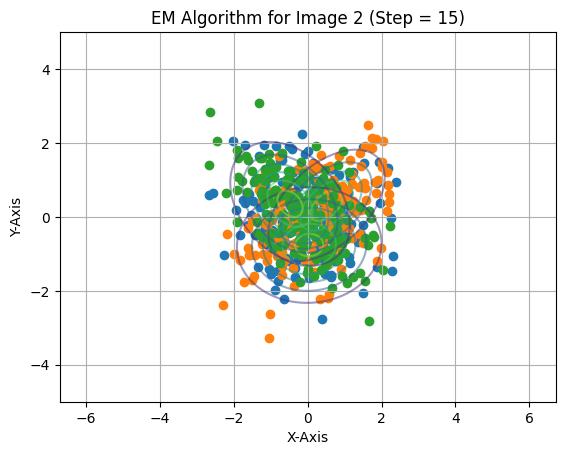

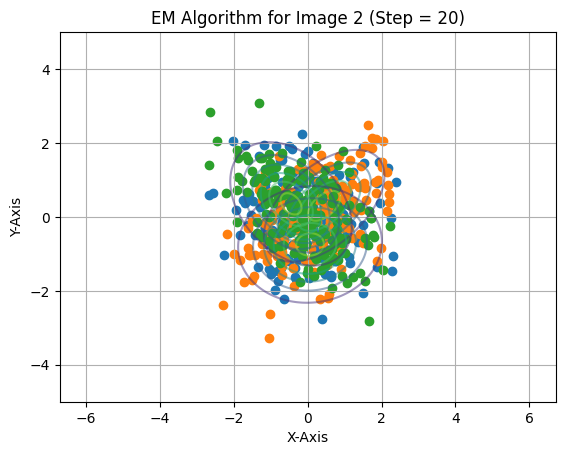

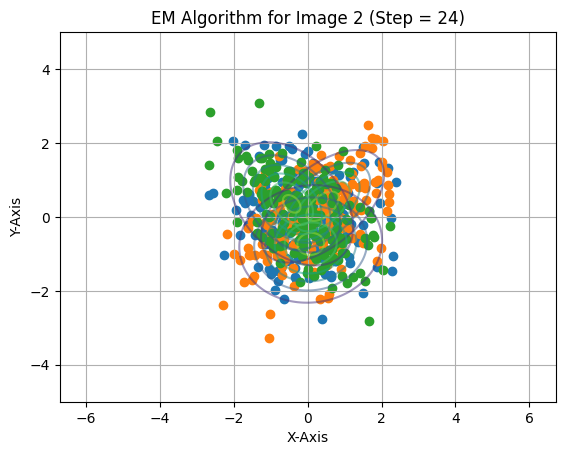

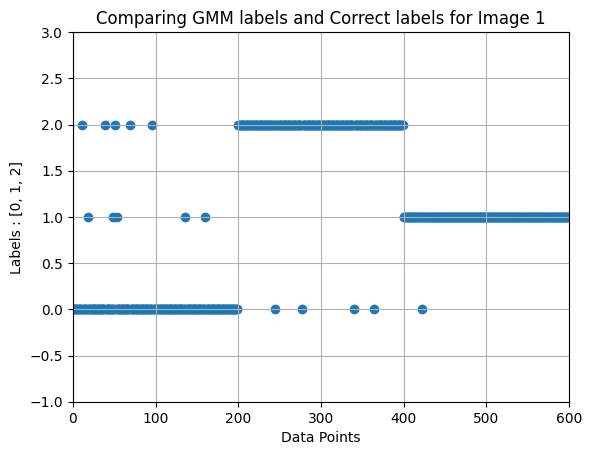

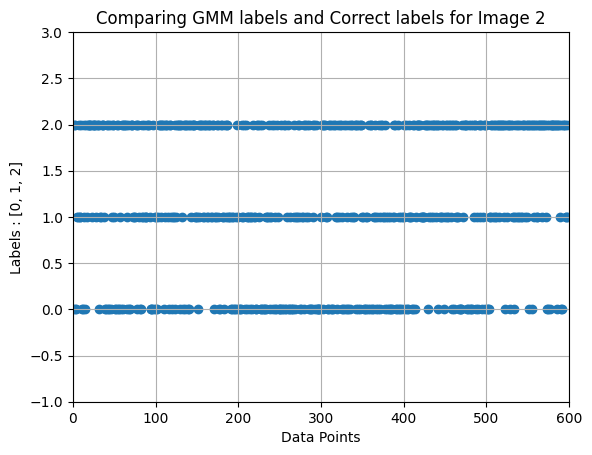

In [8]:
# Part4

# Setting the variables 
S = 25
N = 600
K = 3


# Image1
x1 = np.transpose(df1.to_numpy()[:, [1, 2]])

# Initializing the parameters to start the algorithm
pi1 = np.ones((1, K))/K
mu1 = np.zeros([2, K])
Sigma1 = np.zeros([2, 2*K])
for k in range(K):
  mu1[0, k] = random.choice(x1[0, :])
  mu1[1, k] = random.choice(x1[1, :])
  Sigma1[:, [2*k, 2*k+1]] = np.cov(x1)

# EM for S steps
for s in range(S):

  # Plotting some steps
  ss = [0, 2, 4, 6, 15, 24]

  if (s in ss):

    plt.figure()

    # Plotting the data set with correct labels
    plt.scatter(dis11X,dis11Y)
    plt.scatter(dis12X,dis12Y)
    plt.scatter(dis13X,dis13Y)

    # Plotting the GMM fitted
    z1 = np.linspace(-8, 8, N) 
    z2 = np.linspace(-8, 8, N)
    X,Y = np.meshgrid(z1,z2) 
    pos = np.empty(X.shape + (2,))                
    pos[:, :, 0] = X; pos[:, :, 1] = Y 

    for k in range(K):
      Z =  multivariate_normal(mu1[:, k], Sigma1[:, [2*k, 2*k+1]])
      plt.contour(X, Y, pi1[0, k] * Z.pdf(pos),alpha = 0.5) 
      plt.axis('equal') 
      plt.xlabel('X-Axis')                                                  
      plt.ylabel('Y-Axis')                                                  
      plt.title('EM Algorithm for Image 1 (Step = '+ str(s)+ ')')                                            
      plt.grid()

  # E-Step
  gamma1 = E_Step(x1, N, K, pi1, mu1, Sigma1)
  # M-Step
  [pi1, mu1, Sigma1] = M_Step(N, K, x1, gamma1)
      

# Image2
x2 = np.transpose(df2.to_numpy()[:, [1, 2]])

pi2 = np.ones((1, K))/K
mu2 = np.zeros([2, K])
Sigma2 = np.zeros([2, 2*K])
for k in range(K):
  mu2[0, k] = random.choice(x2[0, :])
  mu2[1, k] = random.choice(x2[1, :])
  Sigma2[:, [2*k, 2*k+1]] = np.cov(x2)

for s in range(S):
  ss = [0, 5, 10, 15, 20, 24]

  if (s in ss):

    plt.figure()

    plt.scatter(dis21X,dis21Y)
    plt.scatter(dis22X,dis22Y)
    plt.scatter(dis23X,dis23Y)

    z1 = np.linspace(-5, 5, N) 
    z2 = np.linspace(-5, 5, N)
    X,Y = np.meshgrid(z1,z2) 
    pos = np.empty(X.shape + (2,))                
    pos[:, :, 0] = X; pos[:, :, 1] = Y 

    for k in range(K):
      Z = multivariate_normal(mu2[:, k], Sigma2[:, [2*k, 2*k+1]])
      plt.contour(X, Y, pi2[0, k] * Z.pdf(pos),alpha = 0.5) 
      plt.axis('equal') 
      plt.xlabel('X-Axis')                                                  
      plt.ylabel('Y-Axis')                                                  
      plt.title('EM Algorithm for Image 2 (Step = '+ str(s)+ ')')                                            
      plt.grid()

  gamma2 = E_Step(x2, N, K, pi2, mu2, Sigma2)
  [pi2, mu2, Sigma2] = M_Step(N, K, x2, gamma2)


# Plotting the new labels in order to compare
plt.figure()
responsibility1 = np.zeros([1, N])
responsibility2 = np.zeros([1, N])
for n in range(N):
  responsibility1[0, n] = np.argmax(gamma1[:, n])
  responsibility2[0, n] = np.argmax(gamma2[:, n])
  
plt.scatter(range(N), responsibility1)
plt.title('Comparing GMM labels and Correct labels for Image 1')  
plt.xlim([0, N])
plt.ylim([-1, K])
plt.xlabel('Data Points')                                                  
plt.ylabel('Labels : [0, 1, 2]')                                                                  
plt.grid()

plt.figure()
plt.scatter(range(N), responsibility2)
plt.title('Comparing GMM labels and Correct labels for Image 2')    
plt.xlim([0, N])
plt.ylim([-1, K])
plt.xlabel('Data Points')                                                  
plt.ylabel('Labels : [0, 1, 2]')                                                                  
plt.grid()


In [9]:
# Part5

print([pi1, mu1, Sigma1])
print([pi2, mu2, Sigma2])


[array([[0.32720716, 0.33881227, 0.33398057]]), array([[-0.09305754, -2.09552139,  3.13859918],
       [-0.03327598,  4.07622951,  3.01712301]]), array([[ 0.93748647, -0.04008276,  0.88157369, -0.47644009,  1.01594903,
         0.44974391],
       [-0.04008276,  0.90108346, -0.47644009,  0.97273636,  0.44974391,
         0.90709941]])]
[array([[0.32309435, 0.26573173, 0.41117392]]), array([[ 0.39340399,  0.0864843 , -0.42713763],
       [ 0.28494726, -0.72660102,  0.35394188]]), array([[ 0.81044649,  0.41608208,  1.00112297,  0.04504074,  0.76004317,
        -0.28987641],
       [ 0.41608208,  0.67214554,  0.04504074,  0.68435875, -0.28987641,
         0.76087419]])]
